In [1]:
import torch
import scvi
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

sc.set_figure_params(dpi=100, frameon=False, color_map='Reds', facecolor=None)
sc.logging.print_header()

/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/pytorch_lightning/__init__.py:28: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('pytorch_lightning')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  __import__("pkg_resources").declare_namespace(__name__)
Global seed set to 0
/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/flax/struct.py:133: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  ja

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.20.3 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.8


/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
hlca_path = '../datasets/hlca.h5ad'
adata = ad.read(hlca_path)
adata

AnnData object with n_obs × n_vars = 584944 × 2000
    obs: 'sample', 'original_celltype_ann', 'study_long', 'study', 'last_author_PI', 'subject_ID', 'subject_ID_as_published', 'pre_or_postnatal', 'age_in_years', 'age_range', 'sex', 'ethnicity', 'mixed_ethnicity', 'smoking_status', 'smoking_history', 'BMI', 'known_lung_disease', 'condition', 'subject_type', 'cause_of_death', 'sample_type', 'anatomical_region_coarse', 'anatomical_region_detailed', 'tissue_dissociation_protocol', 'cells_or_nuclei', 'single_cell_platform', "3'_or_5'", 'enrichment', 'sequencing_platform', 'reference_genome_coarse', 'ensembl_release_reference_genome', 'cell_ranger_version', 'disease_status', 'fresh_or_frozen', 'cultured', 'cell_viability_%', 'comments', 'Processing_site', 'dataset', 'anatomical_region_level_1', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'ann_highest_res', 'ann_ne

In [26]:
labels = adata.obs.scanvi_label.values

In [3]:
model = scvi.model.SCANVI.load('../models/scanvi_model/', adata)
model

INFO     File ../models/scanvi_model/model.pt already downloaded                                                   


/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/scvi/model/base/_utils.py:134: UserWarning: var_names for adata passed in does not match var_names of adata used to train the model. For valid results, the vars need to be the same and in the same order as the adata used to train the model.
  warnings.warn(
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/scvi/data/fields/_layer_field.py:78: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(
/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/scvi/data/_utils.py:156: UserWarning: Category 18 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  warnings.warn(
/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/scvi/data/_utils.py:156: UserWarning: Category 18 in adata.obs['_

ScanVI Model with the following params: 
unlabeled_category: unlabeled, n_hidden: 128, n_latent: 30, n_layers: 2, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: nb
Training status: Trained

/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` instead.
  cmap = copy(get_cmap(cmap))
/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


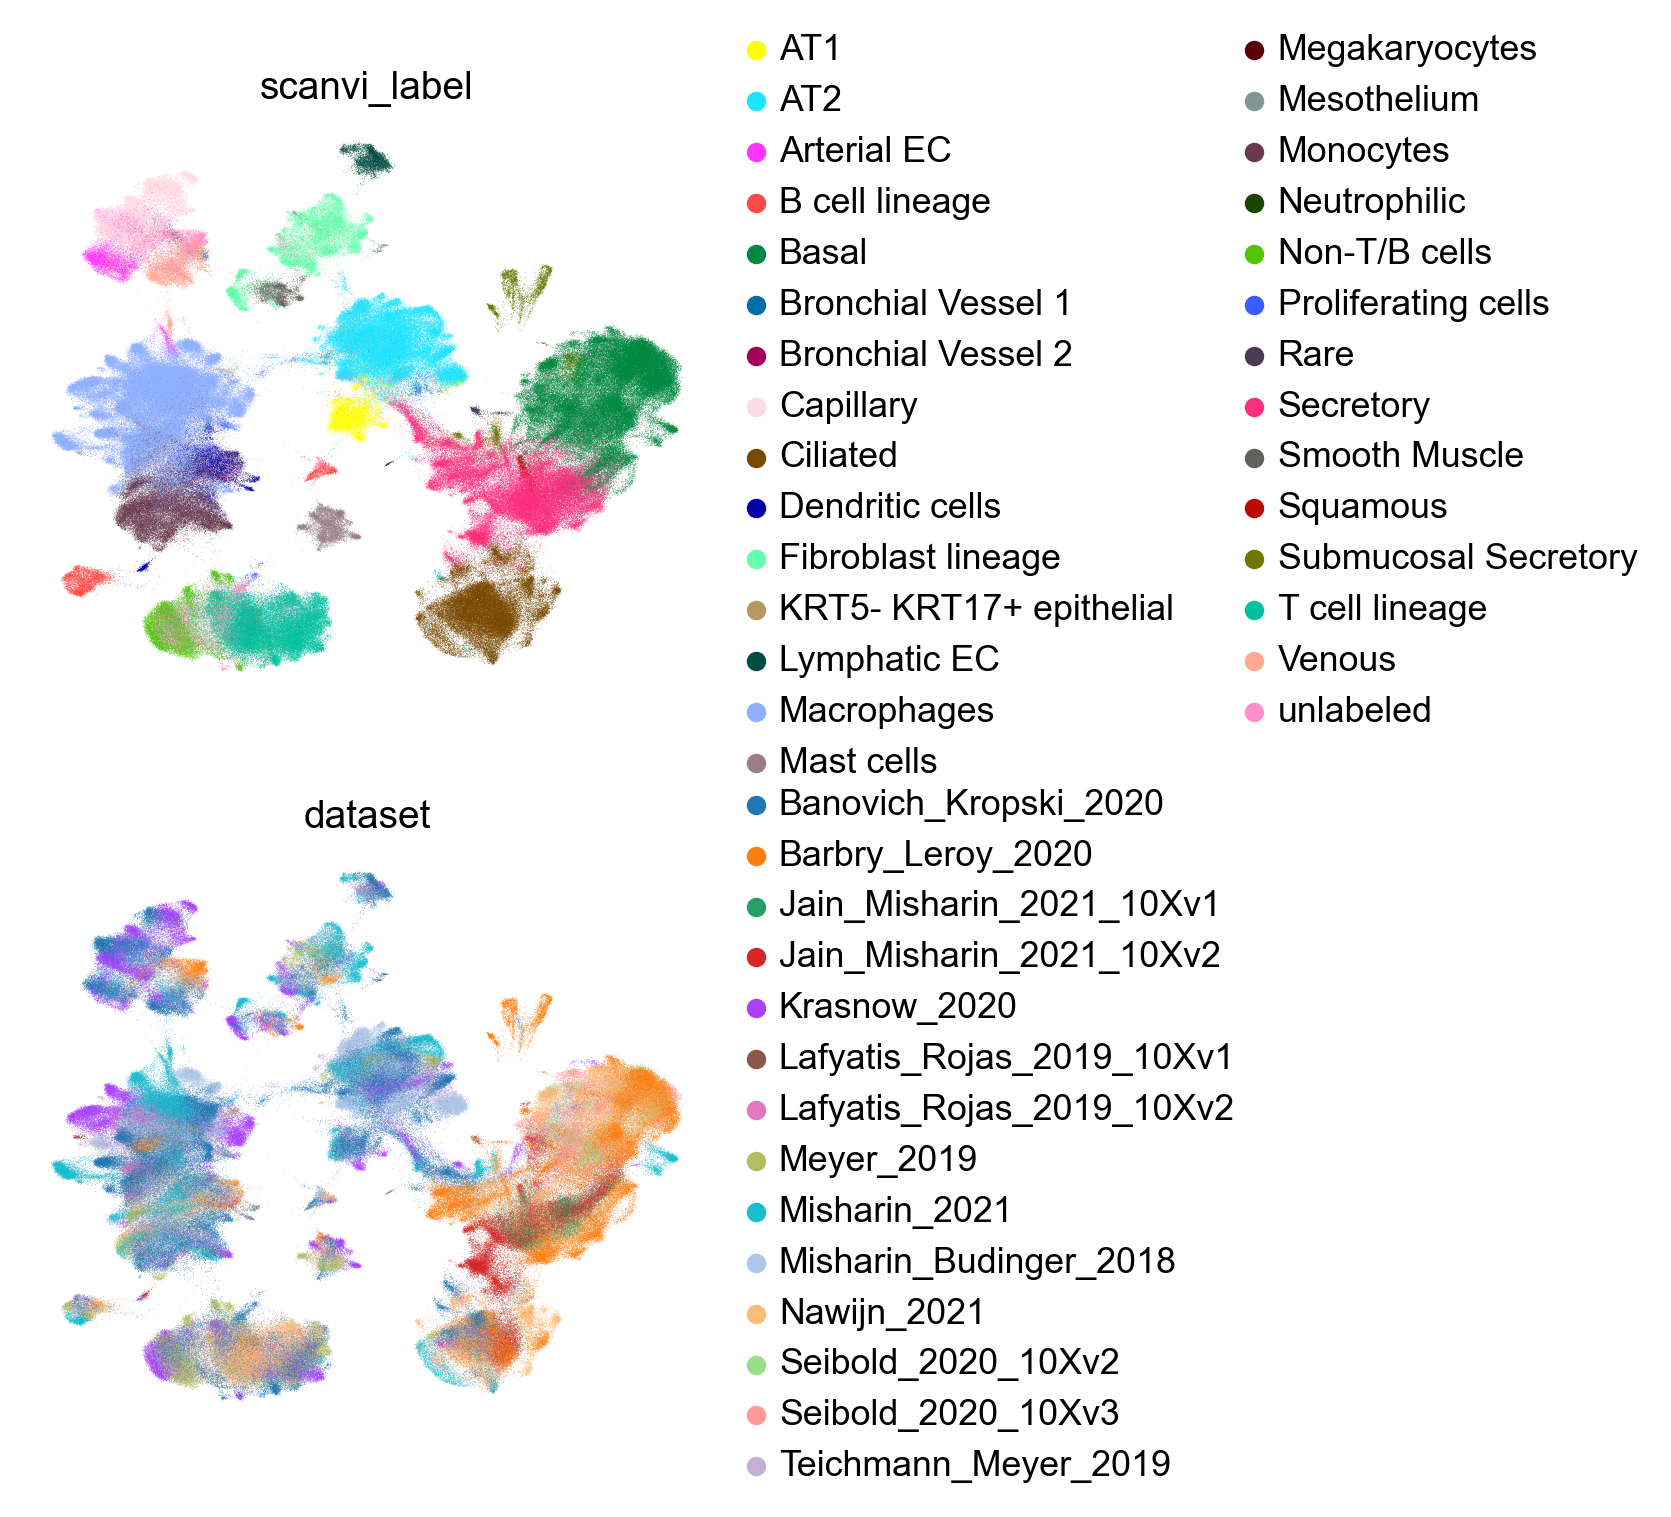

In [13]:
sc.pl.umap(adata, color=['scanvi_label', 'dataset'], ncols=1)

## Assign labels by predicting with scANVI

In [5]:
preds = model.predict(adata)

In [7]:
print(classification_report(labels, preds))

/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

                    AT1       0.00      0.00      0.00      9138
                    AT2       0.87      0.97      0.92     58398
            Arterial EC       0.00      0.00      0.00      6031
         B cell lineage       0.00      0.00      0.00      6361
                  Basal       0.89      0.95      0.92     93000
     Bronchial Vessel 1       0.00      0.00      0.00       455
     Bronchial Vessel 2       0.00      0.00      0.00       235
              Capillary       0.42      0.99      0.59     20597
               Ciliated       0.94      0.98      0.96     42295
        Dendritic cells       0.00      0.00      0.00      7813
     Fibroblast lineage       0.78      0.99      0.87     20549
KRT5- KRT17+ epithelial       0.00      0.00      0.00        11
           Lymphatic EC       0.00      0.00      0.00      4622
            Macrophages       0.73      1.00      0.84    106551
             Mast cells 

/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## assign labels via kNN mapping

Taken from https://www.sc-best-practices.org/cellular_structure/annotation.html#annotation-by-mapping-to-a-reference

In [4]:
X = model.get_latent_representation(adata)

With scanpy.

In [6]:
%%time
ref_emb = ad.AnnData(X, obs=adata.obs)
sc.pp.neighbors(ref_emb, n_neighbors=30)

CPU times: user 10min 10s, sys: 52.9 s, total: 11min 3s
Wall time: 2min 8s


(Just testing the Ingest bug)

In [21]:
# %%time
# ing = sc.tl.Ingest(ref_emb)

CPU times: user 3min 4s, sys: 17.4 s, total: 3min 22s
Wall time: 28.4 s


In [22]:
# a, b = ing._nnd_idx.query(ref_emb.X, 15, epsilon=.1)

In [10]:
# len(ref_emb.obsp['distances'].tolil().rows[2])

29

In [30]:
%%time
perform_label_transfer(
    ref_emb=ref_emb, query_emb=ref_emb, cell_type_column="scanvi_label"
)

Storing transferred labels in your query adata under .obs column: transf_scanvi_label
Storing label transfer uncertainties in your query adata under .obs column: transf_scanvi_label_unc
CPU times: user 5min 3s, sys: 21.2 s, total: 5min 24s
Wall time: 2min 14s


In [37]:
print(classification_report(labels, ref_emb.obs.transf_scanvi_label.values))

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

                    AT1       0.93      0.88      0.90      9138
                    AT2       0.94      0.98      0.96     58398
            Arterial EC       0.85      0.77      0.81      6031
         B cell lineage       0.97      0.88      0.92      6361
                  Basal       0.90      0.95      0.92     93000
     Bronchial Vessel 1       0.91      0.62      0.74       455
     Bronchial Vessel 2       0.93      0.49      0.64       235
              Capillary       0.87      0.90      0.89     20597
               Ciliated       0.98      0.98      0.98     42295
        Dendritic cells       0.84      0.77      0.80      7813
     Fibroblast lineage       0.95      0.90      0.92     20549
KRT5- KRT17+ epithelial       0.00      0.00      0.00        11
           Lymphatic EC       0.94      0.92      0.93      4622
            Macrophages       0.93      0.94      0.94    106551
             Mast cells 

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Manually with `pynndescent`.

In [39]:
import pynndescent

def label_with_knn_proba(ref, query, y_train_labels):
    """
    Params
    ------
    ref : np.array
        First dim must match query.
    query : np.array
        First dim must match ref.
    y_train_labels : list
        Same length as ref.
        
    Returns
    -------
    pred : predictions for `query`
    """
    # fit nearest neighbors (pretty slow even with pynndescent)
    index = pynndescent.NNDescent(ref)
    index.prepare()

    k_nearest = 15
    indices, weights = index.query(query, k_nearest, epsilon=.1)  # same parameters as in BP
    
    pred = []
    for i, idxs in enumerate(indices):
        # store cell types present among neighbors in reference
        unique_labels = np.unique(y_train_labels[idxs])
        # store best label and matching probability so far
        best_label, best_prob = None, 0.0
        # now loop through all cell types present among the cell's neighbors:
        # TODO: there's almost certainly a major speedup that could be done here
        for candidate_label in unique_labels:
            candidate_prob = weights[
                i, y_train_labels[idxs] == candidate_label
            ].sum()
            if best_prob < candidate_prob:
                best_prob = candidate_prob
                best_label = candidate_label

        pred.append(best_label)

    return pred

In [40]:
%%time
pred = label_with_knn_proba(X, X, labels)

CPU times: user 17min 21s, sys: 41.6 s, total: 18min 2s
Wall time: 4min 56s


In [41]:
print(classification_report(labels, pred))

/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

                    AT1       0.94      0.89      0.91      9138
                    AT2       0.94      0.98      0.96     58398
            Arterial EC       0.83      0.82      0.82      6031
         B cell lineage       0.96      0.89      0.93      6361
                  Basal       0.97      0.97      0.97     93000
     Bronchial Vessel 1       0.88      0.63      0.73       455
     Bronchial Vessel 2       0.88      0.48      0.62       235
              Capillary       0.88      0.96      0.92     20597
               Ciliated       0.97      0.98      0.98     42295
        Dendritic cells       0.81      0.74      0.77      7813
     Fibroblast lineage       0.95      0.98      0.96     20549
KRT5- KRT17+ epithelial       0.00      0.00      0.00        11
           Lymphatic EC       0.98      0.97      0.98      4622
            Macrophages       0.95      0.98      0.96    106551
             Mast cells 

/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trying across batches:

In [48]:
adata.obs.dataset.value_counts()

Banovich_Kropski_2020        121894
Barbry_Leroy_2020             74487
Nawijn_2021                   70402
Misharin_2021                 64843
Krasnow_2020                  60982
Misharin_Budinger_2018        41220
Meyer_2019                    35554
Jain_Misharin_2021_10Xv2      33135
Seibold_2020_10Xv3            21466
Lafyatis_Rojas_2019_10Xv2     21260
Jain_Misharin_2021_10Xv1      12422
Teichmann_Meyer_2019          12231
Seibold_2020_10Xv2            12127
Lafyatis_Rojas_2019_10Xv1      2921
Name: dataset, dtype: int64

In [47]:
pd.crosstab(adata.obs.dataset, adata.obs.scanvi_label).astype(bool).sum(axis=1)

dataset
Banovich_Kropski_2020        22
Barbry_Leroy_2020            16
Jain_Misharin_2021_10Xv1     11
Jain_Misharin_2021_10Xv2     11
Krasnow_2020                 24
Lafyatis_Rojas_2019_10Xv1    13
Lafyatis_Rojas_2019_10Xv2    13
Meyer_2019                   14
Misharin_2021                22
Misharin_Budinger_2018       11
Nawijn_2021                  17
Seibold_2020_10Xv2            5
Seibold_2020_10Xv3            5
Teichmann_Meyer_2019         15
dtype: int64

In [50]:
%%time
X = model.get_latent_representation(adata[adata.obs.dataset == 'Krasnow_2020'])
ref_adata = adata[adata.obs.dataset != 'Krasnow_2020']
ref = model.get_latent_representation(ref_adata)

pred = label_with_knn_proba(ref, X, ref_adata.obs.scanvi_label.values)

INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/scvi/model/base/_vaemixin.py:157: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = self._validate_anndata(adata)
/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/scvi/data/fields/_layer_field.py:78: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


INFO     Received view of anndata, making copy.                                                                    


/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/scvi/model/base/_vaemixin.py:157: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = self._validate_anndata(adata)


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/scvi/data/fields/_layer_field.py:78: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(
/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/scvi/data/_utils.py:156: UserWarning: Category 18 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  warnings.warn(
/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/scvi/data/_utils.py:156: UserWarning: Category 18 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  warnings.warn(


In [55]:
print(classification_report(adata[adata.obs.dataset == 'Krasnow_2020'].obs.scanvi_label.values, pred))

/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

                      precision    recall  f1-score   support

                 AT1       0.90      0.98      0.94       972
                 AT2       0.96      0.97      0.96      4482
         Arterial EC       0.88      0.61      0.72      1484
      B cell lineage       0.95      0.91      0.93       428
               Basal       0.79      0.86      0.82       881
  Bronchial Vessel 1       0.00      0.00      0.00       455
  Bronchial Vessel 2       0.00      0.00      0.00       235
           Capillary       0.98      0.72      0.83     12835
            Ciliated       0.98      0.99      0.99      1409
     Dendritic cells       0.97      0.41      0.58      1061
  Fibroblast lineage       0.97      0.94      0.95      3742
        Lymphatic EC       1.00      0.98      0.99       465
         Macrophages       0.96      0.98      0.97     14960
          Mast cells       0.98      0.98      0.98      1901
      Megakaryocytes       0.00      0.00      0.00        11
       

/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/icb/yuge.ji/miniconda3/envs/fa_base/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
